# Demo: The Period Doubling Route to Chaos in the Discrete Logistic Model

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
%matplotlib inline
%config InlineBackend.figure_format='retina'

ATTN: this is definitely a work in progress!!!

To draw the bifurcation diagram, we use the approach in de Vries et al. 

In [3]:
def simulate(r,x0,N):
    
    x = np.zeros(N-1, dtype=float)

    x[0] = x0 # must prescribe initial state
    
    for n in range(1,N-1):
        
        x[n] = r*x[n-1]*(1-x[n-1])
        
    return x

In [50]:
rmin=1.0001
rmax=3.9999
num_r_samples= int(5e4)
N=int(2e3)
tail_size= 100
    
rr = np.linspace(rmin, rmax, num = num_r_samples, endpoint=True)

tails = np.zeros([tail_size, num_r_samples])
    
for m in range(0,num_r_samples): 
    
    r = rr[m]
    
    x0 = 0.9*(r-1.)/r 
    x = simulate(r, x0, N)
    tail = x[-tail_size:]
    
    tails[:, m] = tail

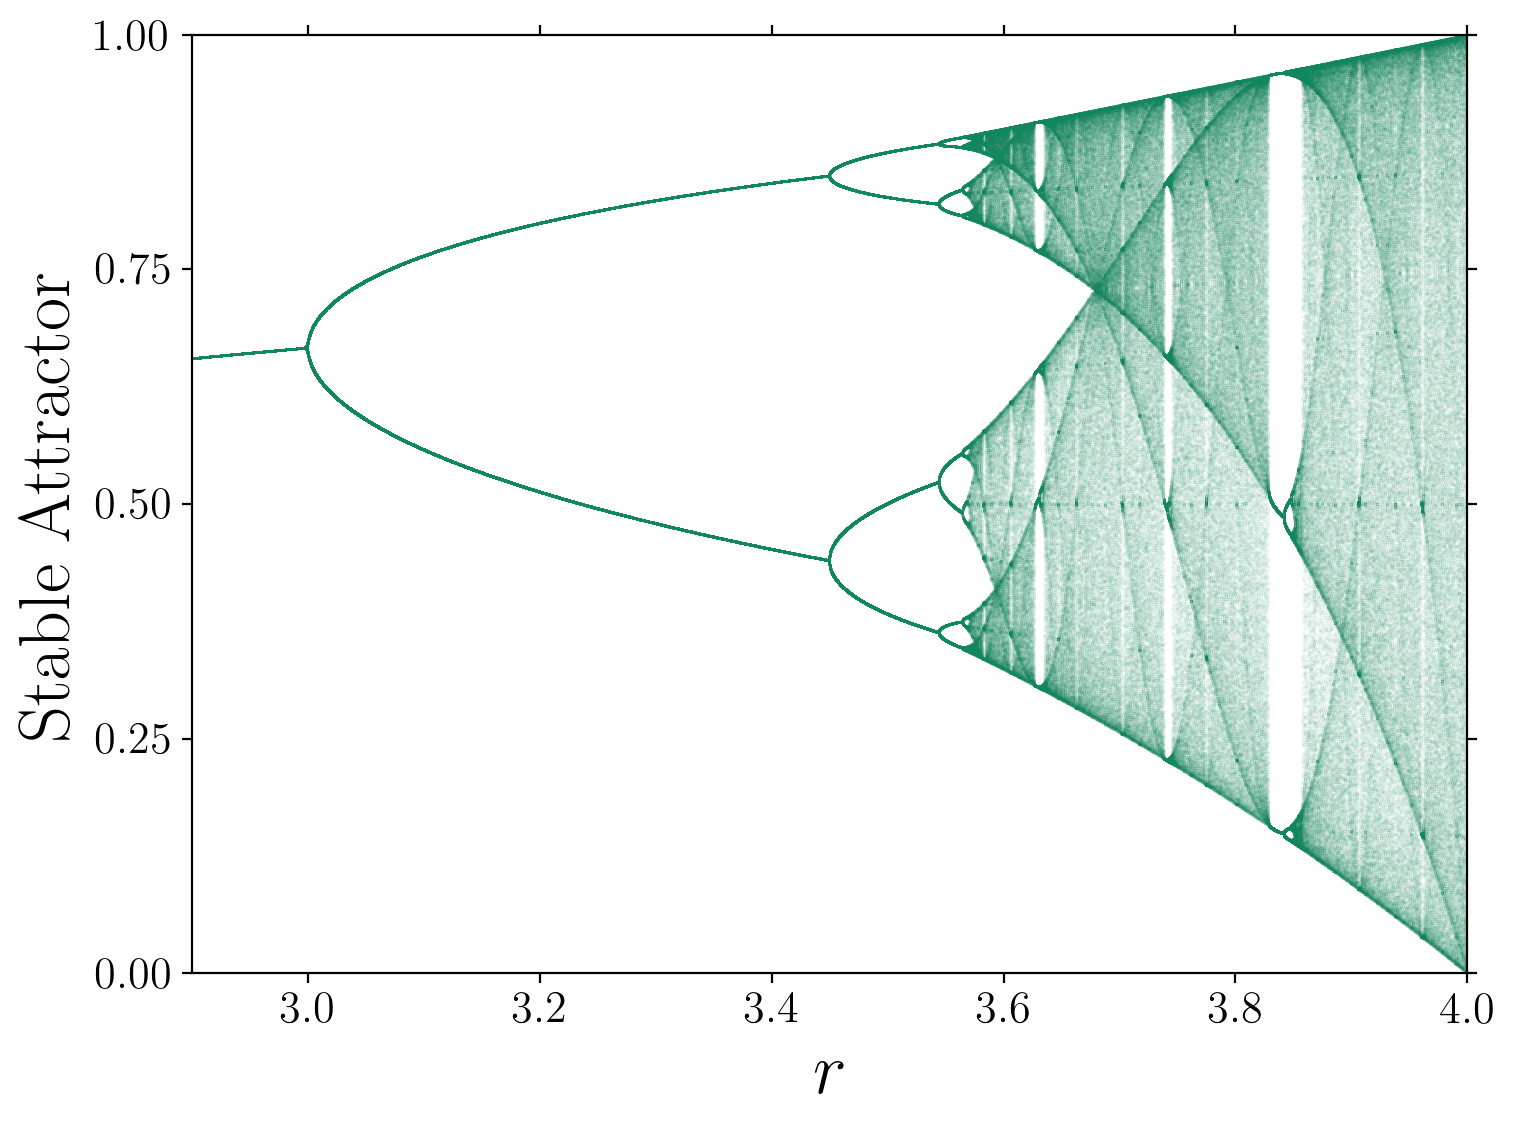

In [62]:
fig, ax =plt.subplots() 

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.scatter(np.ravel(np.tile(rr,tail_size)),np.ravel(tails), s=1e-4, color='xkcd:dark sea green')
plt.xlabel(r"$r$", fontsize=26, color = 'k')
plt.ylabel(r"Stable Attractor", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=4)
ax.locator_params(axis='x', nbins=8)

plt.xlim([2.9, 4])
plt.ylim([0, 1])

plt.frameon = True 

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'dlm_bifurcation_diagram.png'
#plt.savefig(figname, dpi=700)

plt.show()

In [ ]:
# TODO: try the same for the Ricker model? :) 